Available columns: ['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location', 'Date added', 'CIK', 'Founded']


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB

Missing values per column:
Symbol                   0
Security                 0
GICS Sector              0
GICS Sub-Industry        0
Headquarters Location    0
Date added               0
CIK                      0
Founded                  0
dtype: int64

Summary statistics:


,CIK
count,5.030000e+02
mean,8.217536e+05
std,5.665200e+05
min,1.800000e+03
25%,1.005050e+05
50%,9.000750e+05
75%,1.175188e+06
max,2.005951e+06



 Using sector column: GICS Sector
GICS Sector
Industrials               78
Financials                71
Information Technology    67
Health Care               63
Consumer Discretionary    52
Consumer Staples          38
Utilities                 31
Real Estate               31
Materials                 28
Communication Services    22
Energy                    22
Name: count, dtype: int64


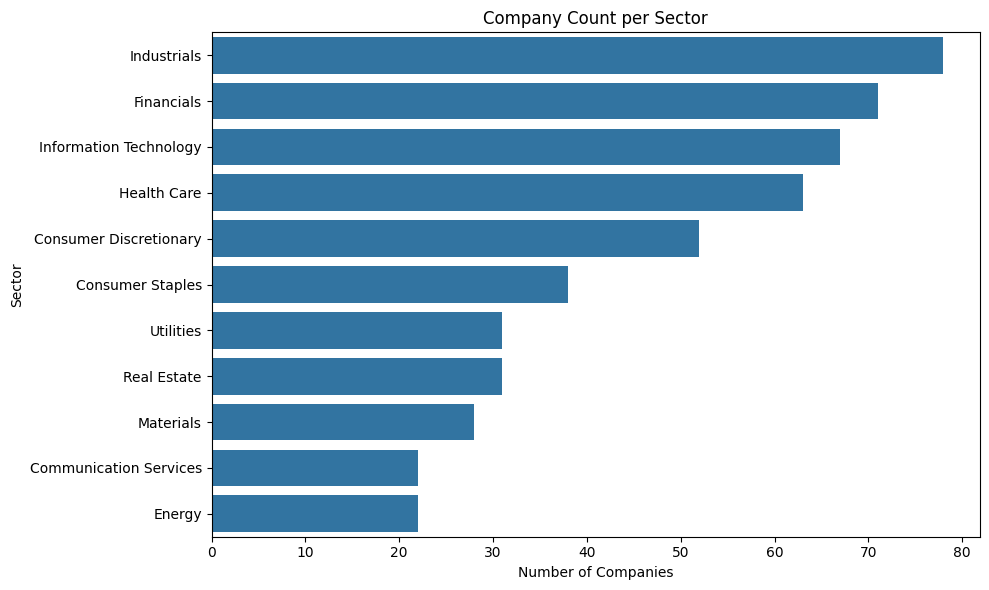

 No 'Market Cap' column found!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv"
df = pd.read_csv(url)

# Show column names
print("Available columns:", df.columns.tolist())

# Display first few rows
display(df.head())

# Dataset Info
df.info()

#  Null Values
print("\nMissing values per column:")
print(df.isnull().sum())

# Describe numeric columns
print("\nSummary statistics:")
display(df.describe())

#  Check for actual sector-like column
sector_col = None
for col in df.columns:
    if 'sector' in col.lower():
        sector_col = col
        break

if sector_col:
    print(f"\n Using sector column: {sector_col}")
    
    # Value counts
    print(df[sector_col].value_counts())

    # Bar plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=sector_col, order=df[sector_col].value_counts().index)
    plt.title('Company Count per Sector')
    plt.xlabel('Number of Companies')
    plt.ylabel('Sector')
    plt.tight_layout()
    plt.show()
else:
    print("No 'sector' column found!")

#  Check for Market Cap column
market_col = None
for col in df.columns:
    if 'market cap' in col.lower():
        market_col = col
        break

if market_col:
    print(f"\n Using Market Cap column: {market_col}")

    # Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(df[market_col], bins=30, kde=True)
    plt.title('Market Cap Distribution')
    plt.xlabel('Market Cap')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Boxplot by Sector
    if sector_col:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x=sector_col, y=market_col)
        plt.xticks(rotation=45)
        plt.title('Market Cap by Sector')
        plt.tight_layout()
        plt.show()
else:
    print(" No 'Market Cap' column found!")